In [16]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [17]:
# Menampilkan Dataset
df = pd.read_csv('data_kriminalitas_provinsi_2022.csv')
df.head()

,Provinsi,pembunuhan,rumah tangga,kesusilaan,narkotika,korupsi
0,Aceh,24,1178,217,1207,1012
1,Sumatera Utara,84,5934,453,4162,5376
2,Sumatera Barat,8,1298,157,922,551
3,Riau,36,1023,176,1470,1214
4,Jambi,15,582,67,626,469


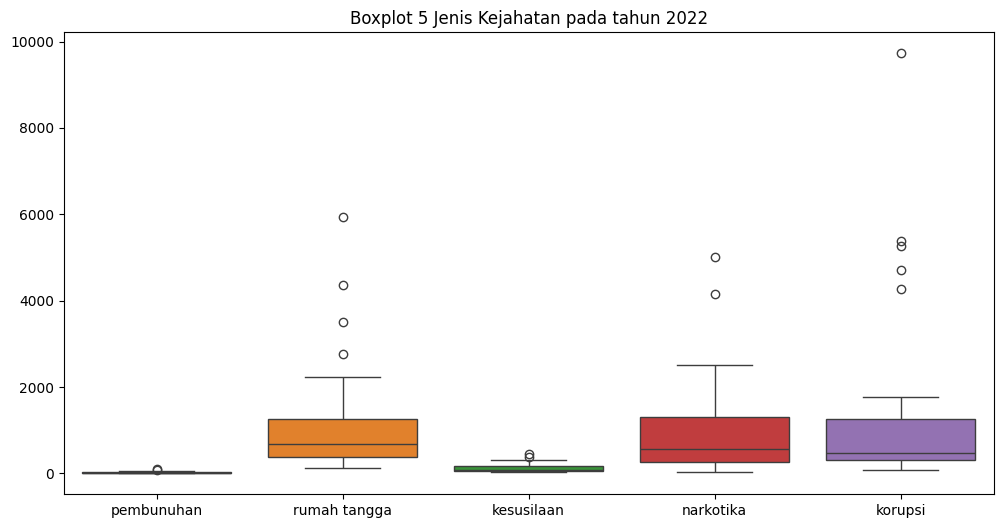

In [18]:
# Menampilkan Deteksi Pencilan
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Provinsi', axis=1))
plt.title('Boxplot 5 Jenis Kejahatan pada tahun 2022')
plt.show()

In [19]:
# Standardisasi Data (z-score)
X = df.drop('Provinsi', axis=1)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

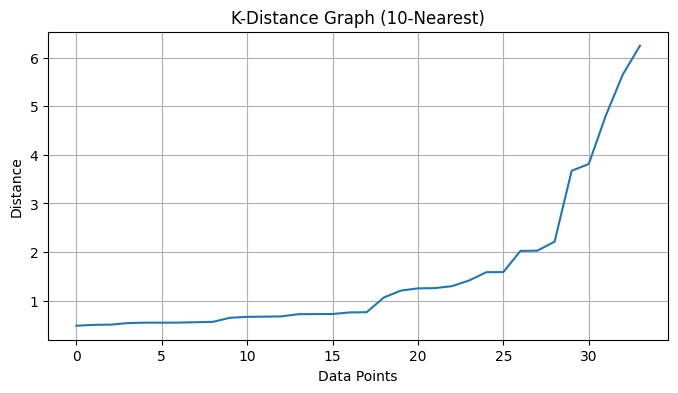

In [21]:
# Cari nilai Eps (bila ingin eksploratif)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_Scaled)
distances, indices = neighbors_fit.kneighbors(X_Scaled)
distances = np.sort(distances[:, 9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-Distance Graph (10-Nearest)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [22]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.68, min_samples=10)
dbscan.fit(X_Scaled)
df['Cluster'] = dbscan.labels_

In [ ]:
# Evaluasi Silhouette Score
if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_Scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print('Silhouette Score tidak dapat dihitung karena hanya ada satu cluster atau semua data adalah noise.')

Silhouette Score: 0.68


In [ ]:
# Hasil Clustering
print("Jumlah Cluster")